# House Property Sales Analysis
The retail industry now heavily relies on data analytics tools to better estimate the prices of different properties. Work on this project idea deals with analyzing the sales of house properties in a city in Australia.

Dataset: The House Property Sales dataset on Kaggle contains a file named ‘raw_sales.csv.’ It includes the following variables:

Datesold: The date when an owner sold the house to a buyer.

Postcode: 4 digit postcode of the suburb where the owner sold the property.

Price: Price for which the owner sold the property.

Bedrooms: Number of bedrooms.

SQL Project Idea: First, use basic commands in SQL to get a feel of the scale of the numbers involved in the dataset. After that, answer the questions mentioned below to learn more about the patterns in the dataset.

1. Which date corresponds to the highest number of sales?

2. Find out the postcode with the highest average price per sale? (Using Aggregate Functions)

3. Which year witnessed the lowest number of sales?

4. Use the window function to deduce the top six postcodes by year's price.

## Data Overview

In [ ]:
# get a feel of the scale of the numbers involved in the dataset
SELECT *
FROM raw_sales

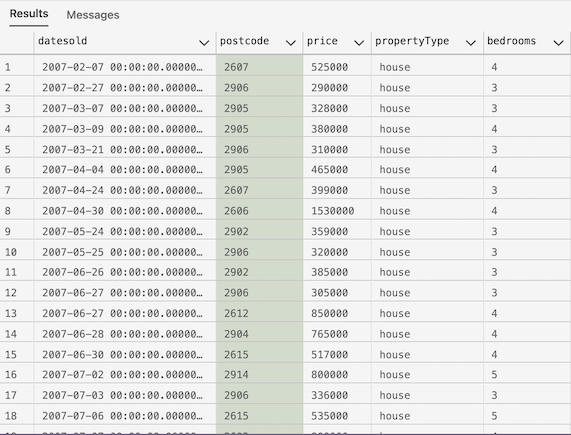

## Questions

In [ ]:
# Which date corresponds to the highest number of sales?
SELECT TOP 1 datesold AS date, COUNT(*) AS number_of_sales
FROM raw_sales
GROUP BY datesold
ORDER BY number_of_sales DESC

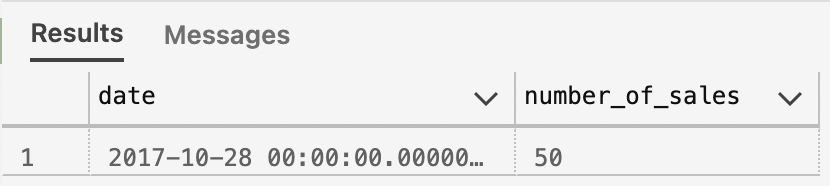

In [ ]:
# Find the postcode with the highest average price per sale? (Using Aggregate Functions)
SELECT TOP 1 postcode, AVG(price) AS avg_price
FROM raw_sales
GROUP BY postcode
ORDER BY AVG(price) DESC

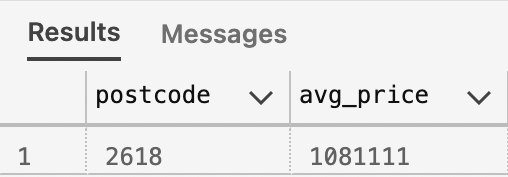

In [ ]:
# Which year witnessed the lowest number of sales?
SELECT TOP 1 YEAR(datesold) AS year, COUNT(*) AS number_of_sales
FROM raw_sales
GROUP BY YEAR(datesold)
ORDER BY number_of_sales ASC

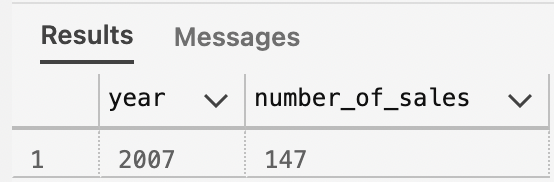

In [ ]:
# Use the window function to deduce the top six postcodes by year's price.

SELECT YEAR(datesold) as year, postcode, price,
         dense_rank() OVER (PARTITION BY YEAR(datesold), postcode ORDER BY price DESC) rnk
INTO #sales2
FROM raw_sales


SELECT r.year, r.postcode, r.price
FROM(
    SELECT *,
    ROW_NUMBER() OVER (PARTITION BY year ORDER BY price DESC) row_num
    FROM #sales2
    WHERE rnk < 2) r
WHERE r.row_num BETWEEN 1 AND 6

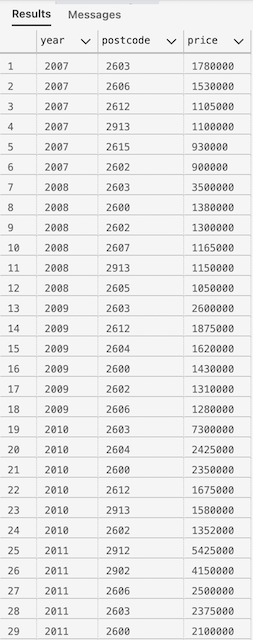
